In [3]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.2 MB/s eta 0:00:00


In [1]:
!pip install insightface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 8.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 89.2 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp311-cp311-linux_x86_64.whl size=1064921 sha256=f83a310cc4a1a60f6190360826b9c5f6c10eedacd02d7c1b684d2e7872fb645f
  Stored in directory: /root/.cache/pip/wheels/27/d8/22/f52d858d16cd06e7b2e6aad34a1777dcfaf000be833bbf8146
Successfully built insightface


In [23]:
from google.colab import files
from IPython.display import display
from google.colab.patches import cv2_imshow
import numpy as np
import insightface
from insightface.app import FaceAnalysis
import cv2
from insightface.utils import face_align

In [5]:
print("Incarcati o imagine de test")
uploaded_test_image_1 = files.upload()  # Allows user to upload a file
# Get the first uploaded file
uploaded_test_image_1_path = list(uploaded_test_image_1.keys())[0]

Incarcati o imagine de test


Saving crin_antonescu_1.jpg to crin_antonescu_1.jpg


In [6]:
print("Incarcati o imagine de test")
uploaded_test_image_2 = files.upload()  # Allows user to upload a file
# Get the first uploaded file
uploaded_test_image_2_path = list(uploaded_test_image_2.keys())[0]

Incarcati o imagine de test


Saving crin_antonescu_3.jpg to crin_antonescu_3.jpg


In [7]:
img1 = cv2.imread(uploaded_test_image_1_path)
img2 = cv2.imread(uploaded_test_image_2_path)

In [8]:
app = FaceAnalysis(allowed_modules=['detection', 'recognition'])
app.prepare(ctx_id=0)

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:06<00:00, 45103.54KB/s]
/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [21]:
faces1 = app.get(img1)
faces2 = app.get(img2)

Detected face: {'bbox': array([276.09875, 129.33476, 558.8701 , 508.27704], dtype=float32), 'kps': array([[342.5418 , 282.8718 ],
       [465.29346, 281.6895 ],
       [396.9998 , 365.30923],
       [357.3898 , 416.12085],
       [458.99713, 415.24796]], dtype=float32), 'det_score': np.float32(0.8807609), 'landmark_3d_68': array([[ 2.74113037e+02,  2.91196777e+02,  1.98687332e+02],
       [ 2.81205750e+02,  3.29839844e+02,  1.93544159e+02],
       [ 2.88753906e+02,  3.69329712e+02,  1.84870819e+02],
       [ 2.96991913e+02,  4.06944977e+02,  1.70202972e+02],
       [ 3.08127167e+02,  4.41083649e+02,  1.39825546e+02],
       [ 3.25902588e+02,  4.65840393e+02,  1.12566803e+02],
       [ 3.46309998e+02,  4.83541534e+02,  8.87259979e+01],
       [ 3.70278442e+02,  4.96358276e+02,  5.82167511e+01],
       [ 4.11055695e+02,  5.05684113e+02,  3.99690475e+01],
       [ 4.54697388e+02,  4.94042267e+02,  4.88554802e+01],
       [ 4.89806824e+02,  4.76275391e+02,  7.69072266e+01],
       [ 5.1848

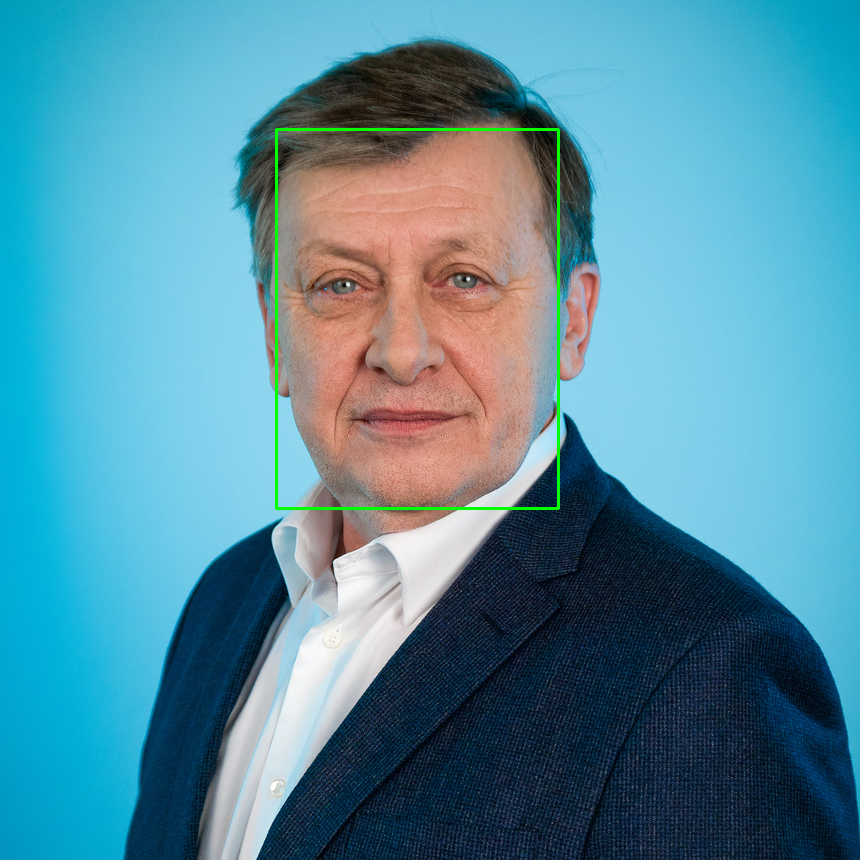

In [10]:
for face in faces1:
    bbox = face['bbox']  # Get bounding box
    print("Detected face:", face)

    # Draw rectangle: (x1, y1) -> (x2, y2)
    cv2.rectangle(img1, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 255, 0), 2)

cv2_imshow(img1)

Detected face: {'bbox': array([301.85522 ,  92.797966, 508.93405 , 357.8262  ], dtype=float32), 'kps': array([[343.4198 , 209.27898],
       [425.11594, 199.43004],
       [378.7885 , 262.306  ],
       [368.63986, 300.07886],
       [431.99054, 291.93427]], dtype=float32), 'det_score': np.float32(0.8284476), 'landmark_3d_68': array([[ 3.11293640e+02,  2.01842270e+02,  1.40108734e+02],
       [ 3.19084045e+02,  2.28715744e+02,  1.39718964e+02],
       [ 3.26536591e+02,  2.56208374e+02,  1.36902695e+02],
       [ 3.33471558e+02,  2.82825500e+02,  1.30142258e+02],
       [ 3.40740417e+02,  3.07835388e+02,  1.12735275e+02],
       [ 3.51743408e+02,  3.25936005e+02,  9.58643265e+01],
       [ 3.64777863e+02,  3.39260040e+02,  8.04611282e+01],
       [ 3.79104156e+02,  3.50167816e+02,  5.99328537e+01],
       [ 4.06186798e+02,  3.55887299e+02,  4.28021049e+01],
       [ 4.37238617e+02,  3.44311493e+02,  4.03837509e+01],
       [ 4.64187195e+02,  3.26536133e+02,  5.18809586e+01],
       [ 4.

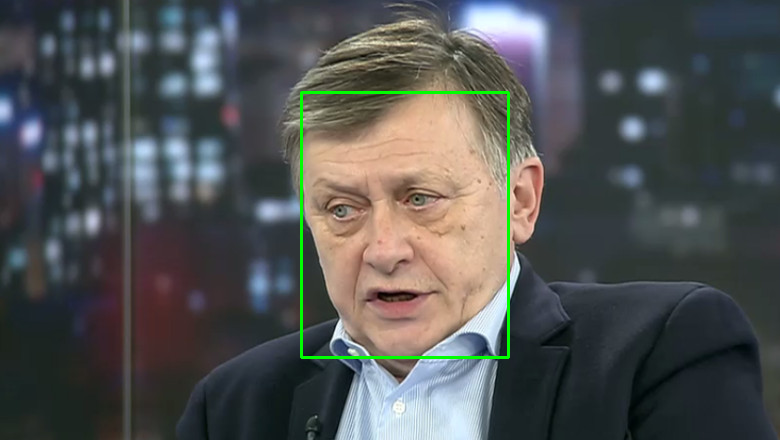

In [11]:
for face in faces2:
    bbox = face['bbox']  # Get bounding box
    print("Detected face:", face)

    # Draw rectangle: (x1, y1) -> (x2, y2)
    cv2.rectangle(img2, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 255, 0), 2)

cv2_imshow(img2)

In [25]:
emb1 = faces1[0].embedding
emb2 = faces2[0].embedding

In [13]:
cosine_similarity = np.dot(emb1, emb2) / (np.linalg.norm(emb1) * np.linalg.norm(emb2))

In [14]:
print("Cosine Similarity:", cosine_similarity)

Cosine Similarity: 0.7444303


In [15]:
threshold = 0.5
if cosine_similarity > threshold:
    print("Cele doua fețe aparțin aceleiași persoane.")
else:
    print("Cele două fețe aparțin unor persoane diferite")

The faces belong to the same person.


# Vizualizarea imaginilor aliniate

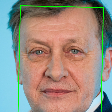

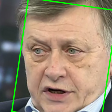

In [26]:
if len(faces1) == 0 or len(faces2) == 0:
    print("No faces detected in one or both images.")
else:
    # Extract facial landmarks
    kps1 = faces1[0].kps  # 5-point landmarks
    kps2 = faces2[0].kps

    # Perform face alignment
    aligned_face1 = face_align.norm_crop(img1, kps1, image_size=112)
    aligned_face2 = face_align.norm_crop(img2, kps2, image_size=112)

    # Display aligned faces
    cv2_imshow(aligned_face1)
    cv2_imshow(aligned_face2)